#  Exoplanets
*Estimating the mass of HD 27447 B via observed oscillations of Epsilon Reticuli's orbit* <br/>
**Author:** Gavin DeBrun

In [4]:
!wget https://courses.physics.illinois.edu/phys246/fa2020/code/exo_helper.py

--2021-02-28 14:55:08--  https://courses.physics.illinois.edu/phys246/fa2020/code/exo_helper.py
Resolving courses.physics.illinois.edu (courses.physics.illinois.edu)... 130.126.151.14
Connecting to courses.physics.illinois.edu (courses.physics.illinois.edu)|130.126.151.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1729 (1.7K) [application/octet-stream]
Saving to: ‘exo_helper.py’

exo_helper.py       100%[===================>]   1.69K  --.-KB/s    in 0s      

2021-02-28 14:55:09 (330 MB/s) - ‘exo_helper.py’ saved [1729/1729]



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from exo_helper import get_planet_vxvy_barycentric
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','math','get_planet_vxvy_barycentric']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    return

In [6]:
SolarSystemParameters=dict()
SolarSystemParameters["EarthOrbitRadius"]      = 149.6e9 # meters
SolarSystemParameters["EarthMass"]       = 5.972e24 # kg
SolarSystemParameters["MoonOrbitRadius"] = 363228.9e3
SolarSystemParameters["MoonMass"]        = 7.34e22 # kg

SolarSystemParameters["JupiterMass"] = 1898600.00e21 #kg
SolarSystemParameters["VenusMass"]   = 4868.5e21     #kg

SolarSystemParameters["SunRadius"] = 695.51e6 #meters
SolarSystemParameters["SunMass"]   = 1.989e30 # kg
SolarSystemParameters["G"]         = 6.67408e-11


## Signal Processing and Fourier Transforms

#### Variation in the host star's radial velocity

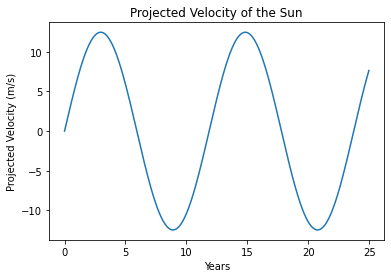

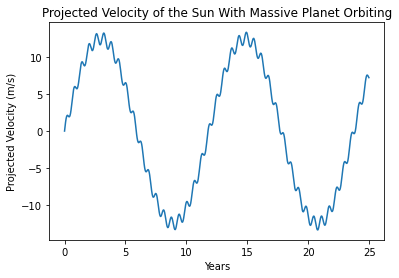

In [7]:
mass = np.array([SolarSystemParameters["SunMass"], SolarSystemParameters["JupiterMass"], 0])
x_velocities = []
times = []
for i in range(0, int(round(365.25*25*24*60*60)), 15*24*60*60):
  vx, vy = get_planet_vxvy_barycentric(mass, i)
  x_velocities.append(vx[0])
  times.append(i)
times = np.array(times)
plt.plot(times/(365.25*24*60*60), x_velocities)
plt.xlabel("Years")
plt.ylabel("Projected Velocity (m/s)")
plt.title("Projected Velocity of the Sun")
plt.show()

mass = np.array([SolarSystemParameters["SunMass"], SolarSystemParameters["JupiterMass"], 10*SolarSystemParameters["VenusMass"]])
x_velocities = []
times = []
for i in range(0, int(round(365.25*25*24*60*60)), 15*24*60*60):
  vx, vy = get_planet_vxvy_barycentric(mass, i)
  x_velocities.append(vx[0])
  times.append(i)
times = np.array(times)
plt.plot(times/(365.25*24*60*60), x_velocities)
plt.xlabel("Years")
plt.ylabel("Projected Velocity (m/s)")
plt.title("Projected Velocity of the Sun With Massive Planet Orbiting")
plt.show()

### Inclination and (Discrete) Fourier Transforms

#### Implementing a DFT

In [8]:
x_velocities = []
y_velocities = []
times = []
for i in range(0, int(round(365.25*100*24*60*60)), 60*60*24):
  vx, vy = get_planet_vxvy_barycentric(mass, i)
  x_velocities.append(vx[0])
  times.append(i/((365.25*24*60*60)))

In [9]:
x_velocities = np.array(x_velocities)
times = np.array(times)

# frequency upper, lower limits in 1/year:
f_max = 2.5
f_min = 1 / 100.
omega_max = 2 * np.pi * f_max
omega_min = 2 * np.pi * f_min

# number of omega values to run through
number_omegas=500

# now the values we will loop over.
omega_array=np.linspace(omega_min,omega_max,number_omegas)
FT_squared = []
for x in range(0, len(omega_array)):
  FT_integral = 0 + 0j
  for i in range(0, len(times)):
    FT_integral += x_velocities[i]*np.exp(-1j * omega_array[x] * times[i])
  FT_integral = FT_integral / np.sqrt(2*np.pi)
  FT_squared.append(FT_integral**2)

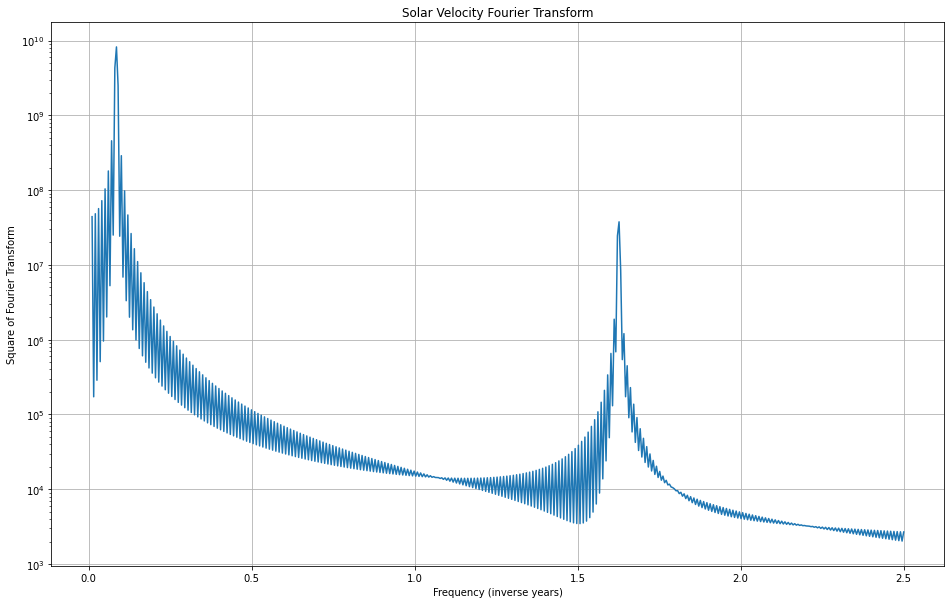

In [10]:
plt.plot(omega_array/(2*np.pi), (np.real(FT_squared)**2 + np.imag(FT_squared)**2)**.5)
plt.yscale("log")
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.ylabel("Square of Fourier Transform")
plt.xlabel("Frequency (inverse years)")
plt.title("Solar Velocity Fourier Transform")
plt.show()

### Calculating projected mass

In [11]:
max = 0
for FT in FT_squared:
  if np.sqrt((np.real(FT)**2 + np.imag(FT)**2)) > max:
    max = FT
amplitude = 0
for velocity in x_velocities:
  if np.abs(velocity) > amplitude:
    amplitude = velocity
index = FT_squared.index(max)
p = (1/(omega_array[index]/(2*np.pi)))*365.25*24*60*60
mProjected = ( ( (SolarSystemParameters["SunMass"]**2 * p) / (2*np.pi*SolarSystemParameters["G"] ) ) ** (1/3) ) * amplitude
print("My estimate for the mass of Jupiter is:", mProjected, "kg")
#print((mProjected - 1.898e27)/(1.898e27))

My estimate for the mass of Jupiter is: 1.984922707628061e+27 kg


## Epsilon Reticuli Data

### Obtain the Data

In [12]:
!wget https://courses.physics.illinois.edu/phys246/fa2020/code/UID_0019921_RVC_002.tbl.txt

--2021-02-28 15:00:22--  https://courses.physics.illinois.edu/phys246/fa2020/code/UID_0019921_RVC_002.tbl.txt
Resolving courses.physics.illinois.edu (courses.physics.illinois.edu)... 130.126.151.14
Connecting to courses.physics.illinois.edu (courses.physics.illinois.edu)|130.126.151.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4993 (4.9K) [text/plain]
Saving to: ‘UID_0019921_RVC_002.tbl.txt’

UID_0019921_RVC_002 100%[===================>]   4.88K  --.-KB/s    in 0s      

2021-02-28 15:00:22 (595 MB/s) - ‘UID_0019921_RVC_002.tbl.txt’ saved [4993/4993]



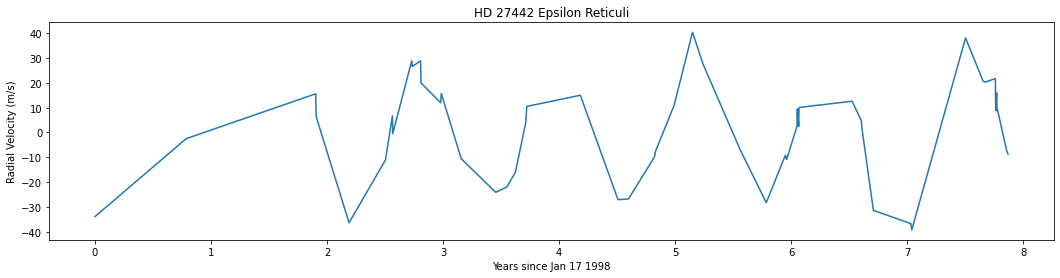

In [13]:
data = np.genfromtxt('UID_0019921_RVC_002.tbl.txt', skip_header=22)
times = data[:,0]
radialVelocities = data[:,1]
uncertainity = data[:,2]


times = np.array(times)

times = (times - times[0]) / 365.25

plt.plot(times, radialVelocities)
plt.gcf().set_size_inches(18,4)
plt.xlabel("Years since Jan 17 1998")
plt.ylabel("Radial Velocity (m/s)")
plt.title("HD 27442 Epsilon Reticuli")
plt.show()

### Estimate the mass of HD 27442 b

```
Epsilon Reticuli b period (years; actual value is 1.17) =  1.18113029085
projected Epsilon Reticuli b mass (actual is 2.961e+27) =  3.27159127374e+27
 elapsed running time =  0.6881752014160156  seconds
 ```

My estimate for the mass of Epsilon Reticuli b is: 3.2541655061688557e+27 kg
My estiamte for the orbital period of Epsilon Reticuli b is: 1.160278745644599 years


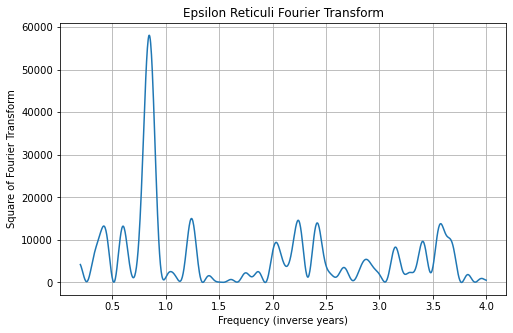

In [14]:
# frequency upper, lower limits in 1/year:
f_max = 4
f_min = .2
omega_max = 2 * np.pi * f_max
omega_min = 2 * np.pi * f_min

# number of omega values to run through
number_omegas=1000

# now the values we will loop over.
omega_array=np.linspace(omega_min,omega_max,number_omegas)
FT_squared = []
for x in range(0, len(omega_array)):
  FT_integral = 0 + 0j
  for i in range(0, len(times)):
    FT_integral += radialVelocities[i]*np.exp(-1j * omega_array[x] * times[i])
  FT_integral = FT_integral / np.sqrt(2*np.pi)
  FT_squared.append(FT_integral**2)
max = 0
for FT in FT_squared:
  if np.sqrt((np.real(FT)**2 + np.imag(FT)**2)) > max:
    max = FT
index = FT_squared.index(max)
amplitude = 0
for velocity in radialVelocities:
  if np.abs(velocity) > amplitude:
    amplitude = velocity
p = (1/(omega_array[index]/(2*np.pi)))*365.25*24*60*60
mProjected = ( ( ( (SolarSystemParameters["SunMass"] * 1.23)**2 * p) / (2*np.pi*SolarSystemParameters["G"] ) ) ** (1/3) ) * amplitude
print("My estimate for the mass of Epsilon Reticuli b is:", mProjected, "kg")
print("My estiamte for the orbital period of Epsilon Reticuli b is:", p/(365.25*24*60*60), "years")

plt.plot(omega_array/(2*np.pi), (np.real(FT_squared)**2 + np.imag(FT_squared)**2)**.5)
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.ylabel("Square of Fourier Transform")
plt.xlabel("Frequency (inverse years)")
plt.title("Epsilon Reticuli Fourier Transform")
plt.show()